<a href="https://colab.research.google.com/github/tim-fihost/ai-application-/blob/main/week11/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)
# make sure your filename is the same as how you want to import
with open('utilities.py', 'w') as f:
  f.write(r.text)


In [5]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from utilities import train_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = '/content/book_store_sales.csv'
def readfile(file_name):
  file = open(file_name,	encoding='utf—8')
  next(file)
  data = []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
    file.close()
    return np.array(data, dtype=np.float32)
# Read data and split up into train and test data.
sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]


In [6]:
import pandas as pd
df=pd.read_csv('/content/book_store_sales.csv')
df

,Period,Value
0,Jan-92,790
1,Feb-92,539
2,Mar-92,535
3,Apr-92,523
4,May-92,552
...,...,...
343,Aug-20,725
344,Sep-20,583
345,Oct-20,427
346,Nov-20,465


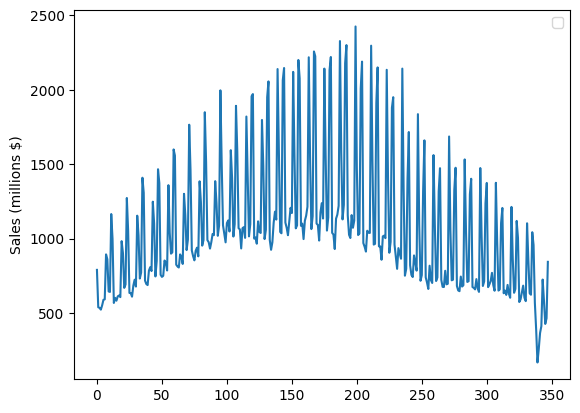

In [7]:

plt.plot(df['Value'])
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()


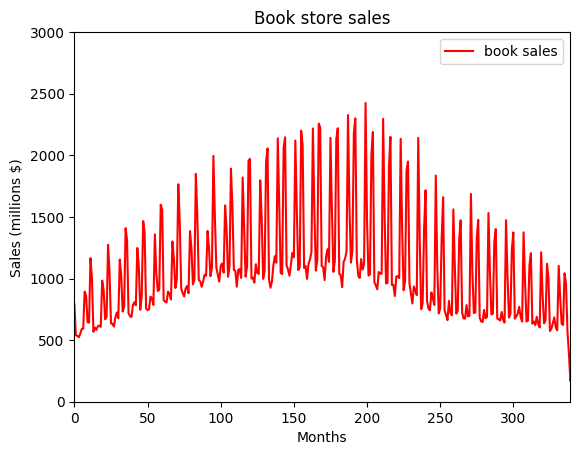

In [15]:

#Plot dataset
x = range(len(sales))
plt.plot(df["Value"], 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()


<ipython-input-13-5918c4210c77>:8: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis ([0,len(test_output), 0.0, 3000.0])


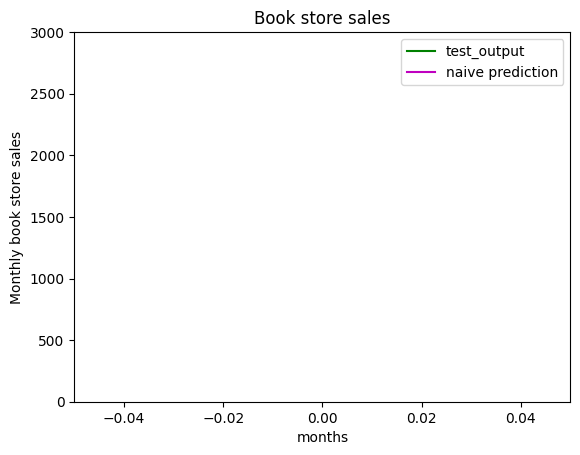

In [13]:
# Plot naive prediction
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x,test_output, 'g-', label='test_output')
plt.plot(x,naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis ([0,len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()